In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Most recent date in data set:", most_recent_date)

Most recent date in data set: ('2017-08-23',)


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print("One year from the most recent data in data set:", year_ago)

One year from the most recent data in data set: 2016-08-23


In [23]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    order_by(Measurement.date).all()

for record in prcp_data:
    print(record)



('2016-08-23', 0.0)
('2016-08-23', 3.8)
('2016-08-23', 1.3)
('2016-08-23', None)
('2016-08-23', 0.5)
('2016-08-23', 45.5)
('2016-08-23', 17.8)
('2016-08-24', 2.0)
('2016-08-24', 54.6)
('2016-08-24', 57.9)
('2016-08-24', None)
('2016-08-24', 31.0)
('2016-08-24', 54.6)
('2016-08-24', 36.8)
('2016-08-25', 2.0)
('2016-08-25', 2.0)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 5.3)
('2016-08-25', 1.5)
('2016-08-25', 2.8)
('2016-08-26', 0.0)
('2016-08-26', 0.8)
('2016-08-26', 0.5)
('2016-08-26', 1.0)
('2016-08-26', 0.0)
('2016-08-26', 0.3)
('2016-08-27', 0.0)
('2016-08-27', 4.6)
('2016-08-27', 0.5)
('2016-08-27', 0.0)
('2016-08-27', 3.0)
('2016-08-27', None)
('2016-08-28', 0.3)
('2016-08-28', 3.6)
('2016-08-28', 3.6)
('2016-08-28', 3.6)
('2016-08-28', 15.2)
('2016-08-28', 52.6)
('2016-08-29', 0.0)
('2016-08-29', 4.3)
('2016-08-29', 1.0)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 8.9)
('2016-08-29', 22.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016-08-30', 0.5)
('2016

In [31]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(prcp_data, columns = ["date", "prcp"])
climate_df.set_index("date")



,prcp
date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,NaN
2016-08-23,0.5
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,0.0


In [29]:
# Sort the dataframe by date
#This was already sorted in the query


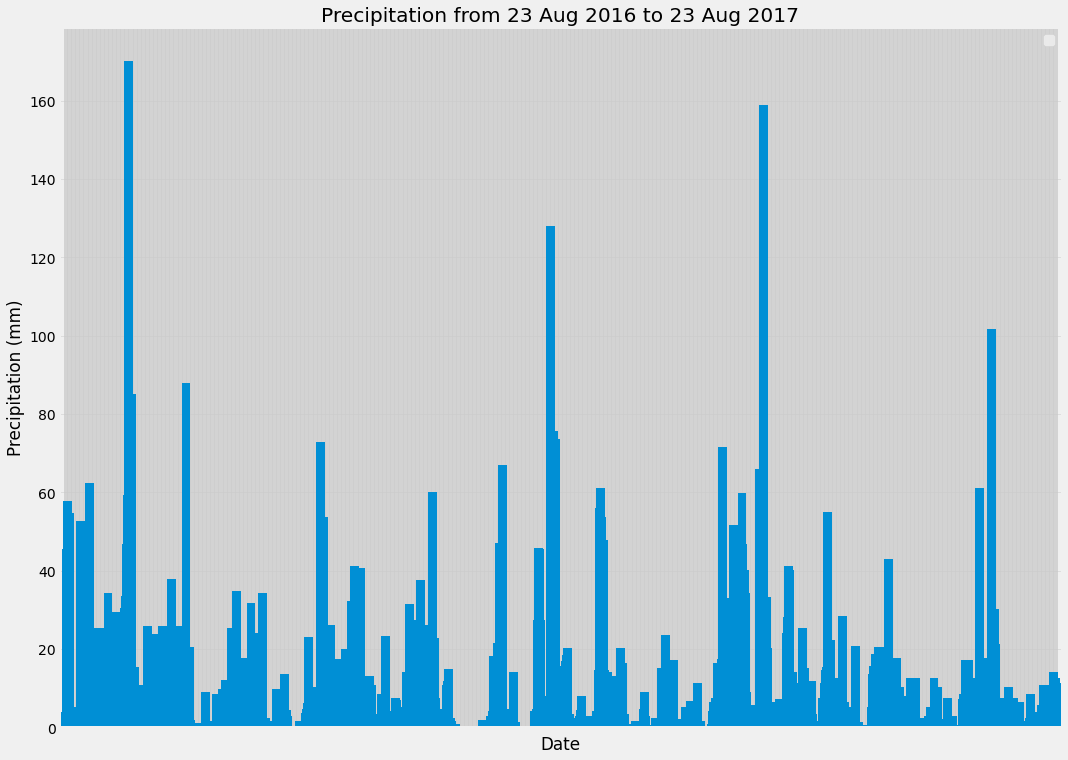

In [82]:
# Use Pandas Plotting with Matplotlib to plot the data
                  
climate_bar = climate_df.plot.bar(figsize=(16,12), width=20)
climate_bar.set_title(f"Precipitation from 23 Aug 2016 to 23 Aug 2017")
climate_bar.set_xlabel("Date")
climate_bar.set_ylabel("Precipitation (mm)")
climate_bar.set_xticklabels([])
climate_bar.legend([])
climate_bar.grid(which="major", linestyle = '-', linewidth = 0.5)

climate_bar
                


In [62]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = climate_df["prcp"].describe()
summary_df = pd.DataFrame(summary)
summary_df.rename(columns = {"prcp" : "Precipitation"})


,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).group_by(Station.station).count()

9

In [65]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
most_active= most_active_station[0]

session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active).all()


[('USC00519281', 12.2, 29.4, 22.03582251082252)]

In [77]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
temp_data = session.query(Measurement.tobs).\
    filter(Measurement.station==most_active).\
    filter(Measurement.date>=year_ago).all()
temp_data

[(25.0),
 (25.0),
 (26.7),
 (26.7),
 (23.9),
 (22.8),
 (25.6),
 (25.0),
 (25.6),
 (26.7),
 (26.7),
 (25.6),
 (25.6),
 (25.6),
 (22.8),
 (23.3),
 (26.7),
 (26.1),
 (25.0),
 (26.7),
 (24.4),
 (26.1),
 (23.9),
 (26.1),
 (25.6),
 (26.1),
 (25.6),
 (25.6),
 (24.4),
 (23.3),
 (25.0),
 (25.6),
 (26.1),
 (26.1),
 (25.0),
 (26.7),
 (25.6),
 (25.6),
 (25.6),
 (25.0),
 (26.1),
 (26.1),
 (26.1),
 (26.1),
 (23.9),
 (24.4),
 (22.8),
 (22.2),
 (21.7),
 (25.0),
 (26.1),
 (25.6),
 (26.1),
 (25.0),
 (26.1),
 (25.0),
 (25.6),
 (25.6),
 (25.6),
 (25.6),
 (25.0),
 (23.3),
 (23.9),
 (24.4),
 (22.8),
 (24.4),
 (23.3),
 (25.0),
 (24.4),
 (24.4),
 (23.3),
 (23.9),
 (23.9),
 (23.9),
 (23.9),
 (21.7),
 (17.2),
 (21.1),
 (20.0),
 (19.4),
 (25.0),
 (23.3),
 (25.0),
 (24.4),
 (24.4),
 (23.9),
 (24.4),
 (23.9),
 (22.8),
 (23.9),
 (22.8),
 (23.9),
 (23.3),
 (23.9),
 (23.3),
 (23.9),
 (22.8),
 (23.9),
 (22.8),
 (22.8),
 (23.3),
 (21.1),
 (22.2),
 (21.1),
 (19.4),
 (19.4),
 (20.6),
 (21.1),
 (20.0),
 (20.6),
 (20.6),
 

In [78]:
#Create the data frame
temp_df = pd.DataFrame(temp_data, columns=["tobs"])
temp_df

,tobs
0,25.0
1,25.0
2,26.7
3,26.7
4,23.9
...,...
347,25.0
348,25.0
349,24.4
350,24.4


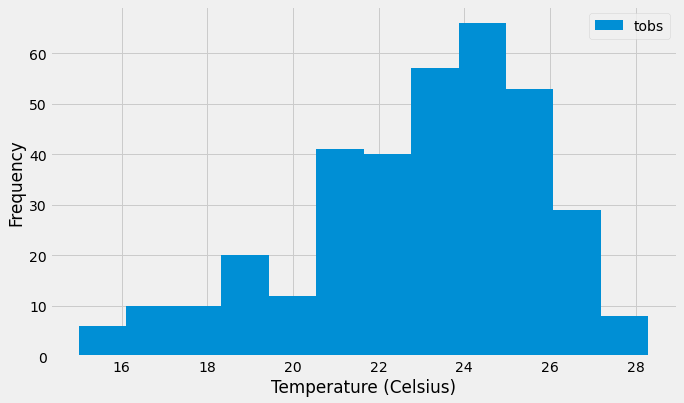

In [88]:
#Plot the results as a histogram

plt.figure(figsize=(10,6))
plt.hist(temp_df["tobs"], bins=12)
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()


# Close session

In [ ]:
# Close Session
session.close()